# Data-Driven Insights for Donor Selection: A Machine Learning Approach

<blockquote> You have been hired to deliver actionable insight to support your client who is a national charitable 
organization. The client seeks to use the results of a previous postcard mail solicitation for donations to 
improve outcome in the next campaign. You want to determine which of the individuals in their mailing 
    database have <b>characteristics similar to those of your most profitable donors</b>. By soliciting only these 
people, your client can spend less money on the solicitation effort and more money on charitable
concerns. 

You have been provided two data sets:

* <i>Donor Raw Data</i>: this is a historical data, containing previous donor details. Target B column, provides information whether they have donated in past campaign or not.

* <i>Prospective Donors</i>: this is a list of new contact; your client is interested in reaching out to in the next campaign they intend to carry out soon.

You are required to deliver a ten-page PowerPoint presentation of your actionable recommendation 
to help the client identify which prospects they should focus their next campaign on. </blockquote>

## Data Preprocessing and Exploration

### Import

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import scipy.stats as stats
# from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency



In [2]:
# Load dataset
donor_raw_data = pd.read_csv('Donor Raw Data_ML with Python.csv', index_col='CONTROL_NUMBER')
prospective_donors = pd.read_csv('Prospective Donor_ML with Python.csv', index_col='CONTROL_NUMBER')

In [3]:
donor_raw_data.head()

,TARGET_B,TARGET_D,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
CONTROL_NUMBER,,,,,,,,,,,,,,,,,,,,,
5,0,NaN,101,87.0,0,?,?,.,H,M,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
12,1,10.0,137,79.0,0,R,2,45,H,M,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
37,0,NaN,113,75.0,0,S,1,11,H,F,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
38,0,NaN,92,NaN,0,U,2,04,H,F,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
41,0,NaN,101,74.0,0,R,2,49,U,F,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


### Handling Missing Values

<AxesSubplot:title={'center':'PROSPECTIVE'}, ylabel='CONTROL_NUMBER'>

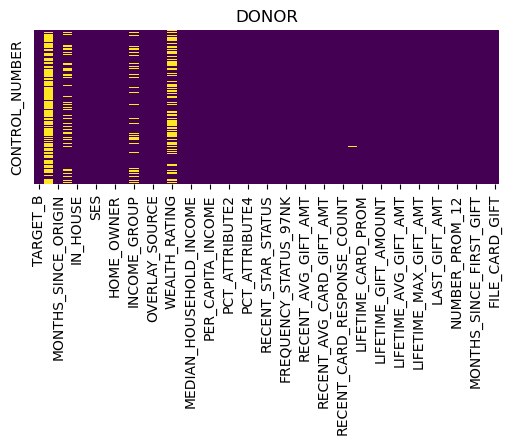

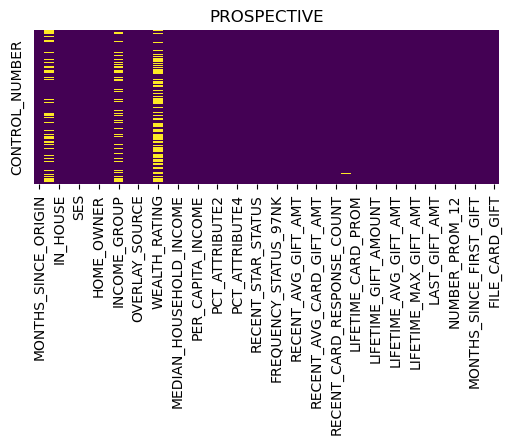

In [4]:
# Using heatmaps to graphical represent missing values
plt.figure(figsize=(6,2))
plt.title('DONOR')
sns.heatmap(donor_raw_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

plt.figure(figsize=(6,2))
plt.title('PROSPECTIVE')
sns.heatmap(prospective_donors.isnull(),yticklabels=False,cbar=False,cmap='viridis')

`Missing fields`

* Target_D
* Donor_Age, 
* Income_Group, 
* Wealth_Rating,
* Months_Since_Last_Prom_Response

`Possible techniques used to handle missing values`
* Mean, median, or mode imputation
* regression imputation
* K-nearest neighbors (KNN) imputation, multiple imputation

#### TARGET_D

In [5]:
# Handle missing values
# Target_D (missing if no response)
donor_raw_data['TARGET_D'].fillna(0, inplace=True)
print(donor_raw_data['TARGET_D'].isnull().sum()) # Verifing that missing values have been filled

0


#### DONOR_AGE

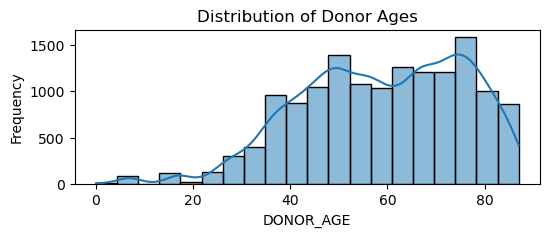

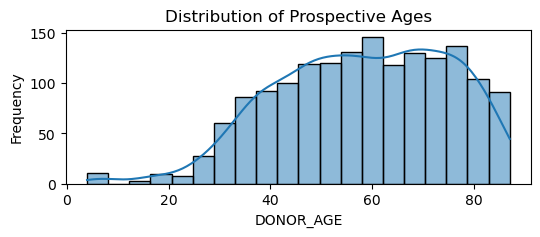

In [6]:
# Checking the frequency of the Donor_age to determine the imputation method to use
plt.figure(figsize=(6, 2))
sns.histplot(data=donor_raw_data, x='DONOR_AGE', bins=20, kde=True)
plt.xlabel('DONOR_AGE')
plt.ylabel('Frequency')
plt.title('Distribution of Donor Ages')
plt.show()

# Checking the frequency of the Donor_age to determine the imputation method to use
plt.figure(figsize=(6, 2))
sns.histplot(data=prospective_donors, x='DONOR_AGE', bins=20, kde=True)
plt.xlabel('DONOR_AGE')
plt.ylabel('Frequency')
plt.title('Distribution of Prospective Ages')
plt.show()

In [7]:
# Donor_Age
# Choosing between mean imputation or median
'''Median imputation is preferred when the distribution is skewed, 
    as the median is less sensitive to outliers than the mean.'''
# Using mean
# mean_age = donor_raw_data['DONOR_AGE'].mean()
# donor_raw_data['DONOR_AGE'].fillna(mean_age, inplace=True)

donor_raw_data['DONOR_AGE'] = donor_raw_data['DONOR_AGE'].replace(0, np.nan)

# Using median
median_age = donor_raw_data['DONOR_AGE'].median()
donor_raw_data['DONOR_AGE'].fillna(median_age, inplace=True)
print(donor_raw_data['DONOR_AGE'].isnull().sum())

prospective_donors['DONOR_AGE'] = prospective_donors['DONOR_AGE'].replace(0, np.nan)

# Using median
median_age = prospective_donors['DONOR_AGE'].median()
prospective_donors['DONOR_AGE'].fillna(median_age, inplace=True)
print(prospective_donors['DONOR_AGE'].isnull().sum())

0
0


It is important to keep in mind that imputing missing values with summary statistics like mean, median, or mode can introduce bias in the data, as it assumes that the missing values are similar to the non-missing values. Additionally, the choice of imputation method can also affect the <i> performance of the machine learning model </i>, as it can impact the relationships between variables in the dataset.

#### INCOME_GROUP

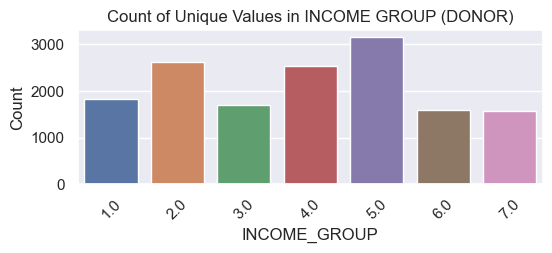

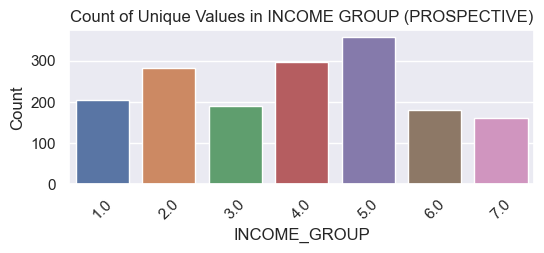

In [8]:
# Having a idea of the INCOME GROUP Data
sns.set(style="darkgrid")
plt.figure(figsize=(6, 2))

sns.countplot(data=donor_raw_data, x='INCOME_GROUP')

plt.xlabel('INCOME_GROUP')
plt.ylabel('Count')
plt.title('Count of Unique Values in INCOME GROUP (DONOR)')

plt.xticks(rotation=45)

plt.show()


# Prospective Donors
sns.set(style="darkgrid")
plt.figure(figsize=(6, 2))

sns.countplot(data=prospective_donors, x='INCOME_GROUP')

plt.xlabel('INCOME_GROUP')
plt.ylabel('Count')
plt.title('Count of Unique Values in INCOME GROUP (PROSPECTIVE)')

plt.xticks(rotation=45)

plt.show()


In [9]:
# Income_Group
# Using mode
mode_group = donor_raw_data['INCOME_GROUP'].mode().iloc[0]
donor_raw_data['INCOME_GROUP'].fillna(mode_group, inplace=True)
print(donor_raw_data['INCOME_GROUP'].isnull().sum())

# Income_Group
mode_group = prospective_donors['INCOME_GROUP'].mode().iloc[0]
prospective_donors['INCOME_GROUP'].fillna(mode_group, inplace=True)
print(prospective_donors['INCOME_GROUP'].isnull().sum())

0
0


Mode imputation is suitable for categorical variables or numerical variables with a small number of unique values.

#### WEALTH_RATING

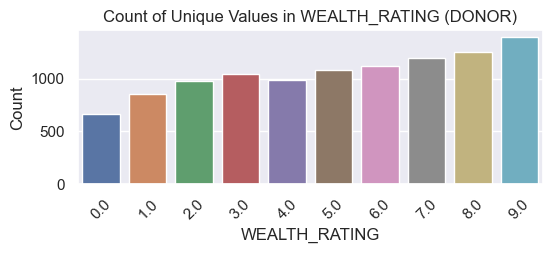

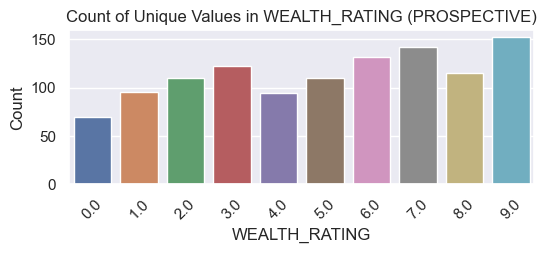

In [10]:
# Having a idea of the INCOME GROUP Data
sns.set(style="darkgrid")
plt.figure(figsize=(6, 2))

sns.countplot(data=donor_raw_data, x='WEALTH_RATING')

plt.xlabel('WEALTH_RATING')
plt.ylabel('Count')
plt.title('Count of Unique Values in WEALTH_RATING (DONOR)')

plt.xticks(rotation=45)

plt.show()

# Prospective Donor
sns.set(style="darkgrid")
plt.figure(figsize=(6, 2))

sns.countplot(data=prospective_donors, x='WEALTH_RATING')

plt.xlabel('WEALTH_RATING')
plt.ylabel('Count')
plt.title('Count of Unique Values in WEALTH_RATING (PROSPECTIVE)')

plt.xticks(rotation=45)

plt.show()

<AxesSubplot:title={'center':'PROSPECTIVE'}, xlabel='INCOME_GROUP', ylabel='WEALTH_RATING'>

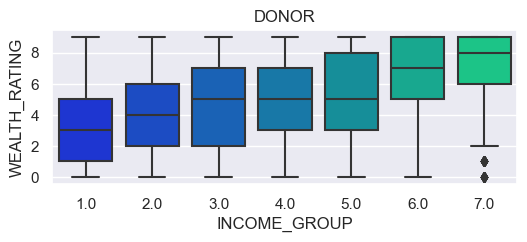

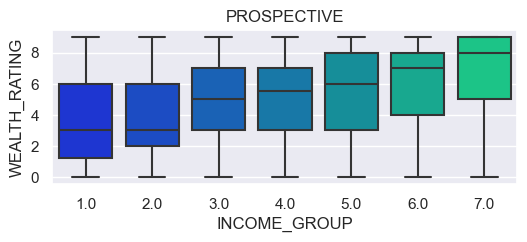

In [11]:
plt.figure(figsize=(6, 2))
plt.title('DONOR')
sns.boxplot(y='WEALTH_RATING',x='INCOME_GROUP',data=donor_raw_data,palette='winter')

plt.figure(figsize=(6, 2))
plt.title('PROSPECTIVE')
sns.boxplot(y='WEALTH_RATING',x='INCOME_GROUP',data=prospective_donors,palette='winter')

In [12]:
def impute_wealthrp(cols):
    wealthr = cols[0]
    incomeg = cols[1]
    
    if pd.isnull(wealthr):

        if incomeg == 1:
            return 3

        elif incomeg == 2:
            return 3
        
        elif incomeg == 3:
            return 5
        
        elif incomeg == 4:
            return 5
        
        elif incomeg == 5:
            return 6
        
        elif incomeg == 6:
            return 7
        
        else:
            return 8

    else:
        return wealthr

In [13]:
def impute_wealthr(cols):
    wealthr = cols[0]
    incomeg = cols[1]
    
    if pd.isnull(wealthr):

        if incomeg == 1:
            return 3

        elif incomeg == 2:
            return 4
        
        elif incomeg == 3:
            return 5
        
        elif incomeg == 4:
            return 5
        
        elif incomeg == 5:
            return 6
        
        elif incomeg == 6:
            return 7
        
        else:
            return 8

    else:
        return wealthr
    
donor_raw_data['WEALTH_RATING'] = donor_raw_data[['WEALTH_RATING','INCOME_GROUP']].apply(impute_wealthr,axis=1)
print(donor_raw_data['WEALTH_RATING'].isnull().sum())

prospective_donors['WEALTH_RATING'] = prospective_donors[['WEALTH_RATING','INCOME_GROUP']].apply(impute_wealthrp,axis=1)
print(prospective_donors['WEALTH_RATING'].isnull().sum())

0
0


#### MONTHS_SINCE_LAST_PROM_RESP

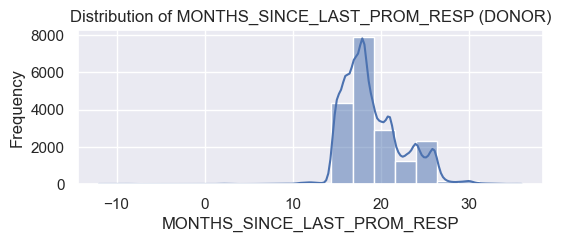

In [14]:
plt.figure(figsize=(6, 2))
sns.histplot(data=donor_raw_data, x='MONTHS_SINCE_LAST_PROM_RESP', bins=20, kde=True)
plt.xlabel('MONTHS_SINCE_LAST_PROM_RESP')
plt.ylabel('Frequency')
plt.title('Distribution of MONTHS_SINCE_LAST_PROM_RESP (DONOR)')
plt.show()

In [15]:
# Months_Since_Last_Prom_Response
# These prospects have not responded to a promotion
print("Number of missing values:", donor_raw_data['MONTHS_SINCE_LAST_PROM_RESP'].isnull().sum())
print("Total number of rows in the data:", len(donor_raw_data))

# I will be deleting this missing values as the effects will not be felt (they are negligible)
donor_raw_data['MONTHS_SINCE_LAST_PROM_RESP'] = donor_raw_data['MONTHS_SINCE_LAST_PROM_RESP'].replace('', np.nan)
donor_raw_data = donor_raw_data.dropna(axis = 0, subset=['MONTHS_SINCE_LAST_PROM_RESP'])
print("New Number of missing values:", donor_raw_data['MONTHS_SINCE_LAST_PROM_RESP'].isnull().sum())

prospective_donors['MONTHS_SINCE_LAST_PROM_RESP'] = prospective_donors['MONTHS_SINCE_LAST_PROM_RESP'].replace('', np.nan)
prospective_donors = prospective_donors.dropna(axis = 0, subset=['MONTHS_SINCE_LAST_PROM_RESP'])
print("New Number of missing values:", prospective_donors['MONTHS_SINCE_LAST_PROM_RESP'].isnull().sum())

Number of missing values: 246
Total number of rows in the data: 19372
New Number of missing values: 0
New Number of missing values: 0


<AxesSubplot:title={'center':'PROSPECTIVE'}, ylabel='CONTROL_NUMBER'>

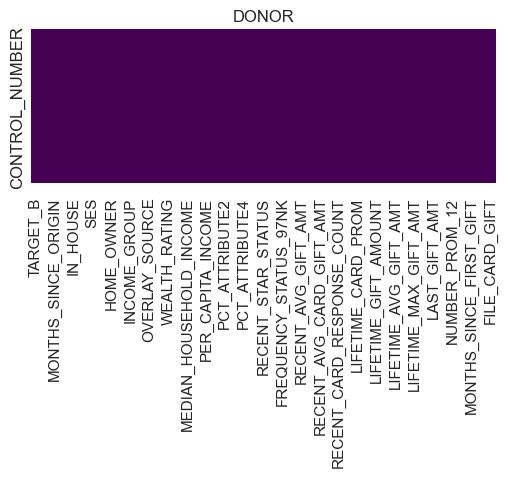

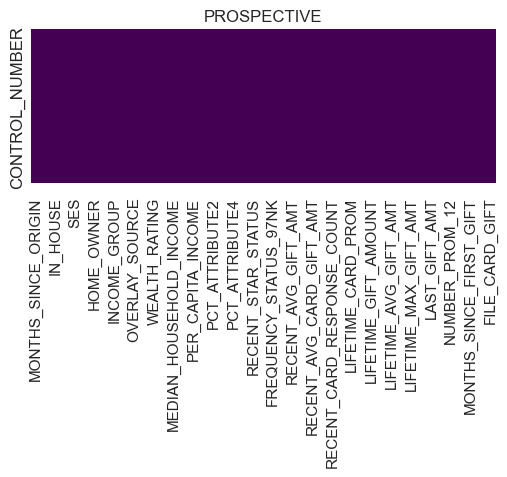

In [16]:
# Confirming if they are still missing data.
plt.figure(figsize=(6,2))
plt.title('DONOR')
sns.heatmap(donor_raw_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Prospective Donor
plt.figure(figsize=(6,2))
plt.title('PROSPECTIVE')
sns.heatmap(prospective_donors.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Handling Irregular values

`Observations`

* URBAN_CITY has ? as Unknown
* SES has ? as unknown also 
* CLUSTER_CODE has . as unknown

In [17]:
# Checking if they are same.
urban_city_unknown_count = (donor_raw_data['URBANICITY'] == '?').sum()

ses_unknown_count = (donor_raw_data['SES'] == '?').sum()

cluster_code_unknown_count = (donor_raw_data['CLUSTER_CODE'] == ' .').sum()

print(urban_city_unknown_count, ses_unknown_count, cluster_code_unknown_count)

446 446 446


In [18]:
# let's give all unknown cities with CLUSTER_CODE = 0  
donor_raw_data['CLUSTER_CODE'].replace(' .',0,inplace = True)
donor_raw_data['CLUSTER_CODE'] = donor_raw_data['CLUSTER_CODE'].astype('int64')

prospective_donors['CLUSTER_CODE'].replace(' .',0,inplace = True)
prospective_donors['CLUSTER_CODE'] = prospective_donors['CLUSTER_CODE'].astype('int64')

### Feature Engineering

In [19]:
# List of columns with 7 groups to convert to categorical
columns_to_convert = ['IN_HOUSE', 'URBANICITY', 'SES','HOME_OWNER', 'DONOR_GENDER',
                      'INCOME_GROUP', 'PUBLISHED_PHONE','OVERLAY_SOURCE','PEP_STAR','RECENCY_STATUS_96NK',
                      'FREQUENCY_STATUS_97NK']

# Loop through the specified columns and convert them to categorical
for column in columns_to_convert:
    donor_raw_data[column] = donor_raw_data[column].astype('category')
    
for column in columns_to_convert:
    prospective_donors[column] = prospective_donors[column].astype('category')

In [20]:
# DONOR_AGE_GROUP'
donor_raw_data['DONOR_AGE_GROUP'] = pd.cut(donor_raw_data['DONOR_AGE'],
                                           bins=[0, 30, 60, 100], labels=['Young', 'Middle-aged', 'Elderly'])

# DONOR_AGE_GROUP'
prospective_donors['DONOR_AGE_GROUP'] = pd.cut(prospective_donors['DONOR_AGE'],
                                               bins=[0, 30, 60, 100], labels=['Young', 'Middle-aged', 'Elderly'])

In [21]:
# GIFT_RANGE
donor_raw_data['GIFT_RANGE'] = donor_raw_data['LIFETIME_MAX_GIFT_AMT'] - donor_raw_data['LIFETIME_MIN_GIFT_AMT']

In [22]:
# INCOME_TO_AGE_RATIO
donor_raw_data['INCOME_TO_AGE_RATIO'] = donor_raw_data['PER_CAPITA_INCOME'] / donor_raw_data['DONOR_AGE']


In [23]:
# RESPONSE_RATE
donor_raw_data['RESPONSE_RATE'] = donor_raw_data['RECENT_RESPONSE_COUNT'] / donor_raw_data['NUMBER_PROM_12']

prospective_donors['RESPONSE_RATE'] = prospective_donors['RECENT_RESPONSE_COUNT'] / prospective_donors['NUMBER_PROM_12']

# Income-to-Home Value Ratio
donor_raw_data['Income_to_Home_Value_Ratio'] = donor_raw_data['PER_CAPITA_INCOME'] / donor_raw_data['MEDIAN_HOME_VALUE']


#### Feature Selection / Dimensionality Reduction

In [24]:
# Correlation Analysis

# Select only numerical features
numerical_features = donor_raw_data.select_dtypes(include=['int64', 'float64'])

# Calculate Pearson correlation coefficients with the target variable
correlation_matrix = numerical_features.corr()
correlation_with_target = correlation_matrix['TARGET_B'].abs().sort_values(ascending=False)

# Set a correlation threshold
correlation_threshold = 0.1

# Select features with correlation above the threshold
selected_n_features = correlation_with_target[correlation_with_target > correlation_threshold].index.tolist()

# Display the selected features
print("Selected Features:")
print(selected_n_features)


Selected Features:
['TARGET_B', 'TARGET_D', 'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT', 'RESPONSE_RATE', 'RECENT_RESPONSE_PROP', 'FILE_CARD_GIFT']


`Categorical Features`

After investigation <i>'TARGET_B', 'IN_HOUSE', 'URBANICITY', 'SES', 'HOME_OWNER', 'DONOR_GENDER',
                      'INCOME_GROUP', 'PUBLISHED_PHONE', 'OVERLAY_SOURCE', 'PEP_STAR', 'RECENCY_STATUS_96NK',
                      'FREQUENCY_STATUS_97NK'</i> column are categorical

In [25]:
# Univariate Feature Selection
categorical_features = donor_raw_data.select_dtypes(include=['object', 'category'])

# Create a contingency table for each categorical feature vs. the target variable
contingency_tables = {}
for feature in categorical_features.columns:
    contingency_table = pd.crosstab(donor_raw_data[feature], donor_raw_data['TARGET_B'])
    contingency_tables[feature] = contingency_table

# Calculate the chi-squared statistic and p-value for each feature
chi2_values = {}
p_values = {}
for feature, table in contingency_tables.items():
    chi2, p, _, _ = stats.chi2_contingency(table)
    chi2_values[feature] = chi2
    p_values[feature] = p

# Set a significance level (you can adjust this)
significance_level = 0.05

# Select features with p-values below the significance level
selected_c_features = [feature for feature, p in p_values.items() if p < significance_level]

# Display the selected features
print("Selected Categorical Features:")
print(selected_c_features)


Selected Categorical Features:
['IN_HOUSE', 'URBANICITY', 'SES', 'INCOME_GROUP', 'PEP_STAR', 'RECENCY_STATUS_96NK', 'FREQUENCY_STATUS_97NK', 'DONOR_AGE_GROUP']


### Visual Exploratory Data Analysis (EDA)

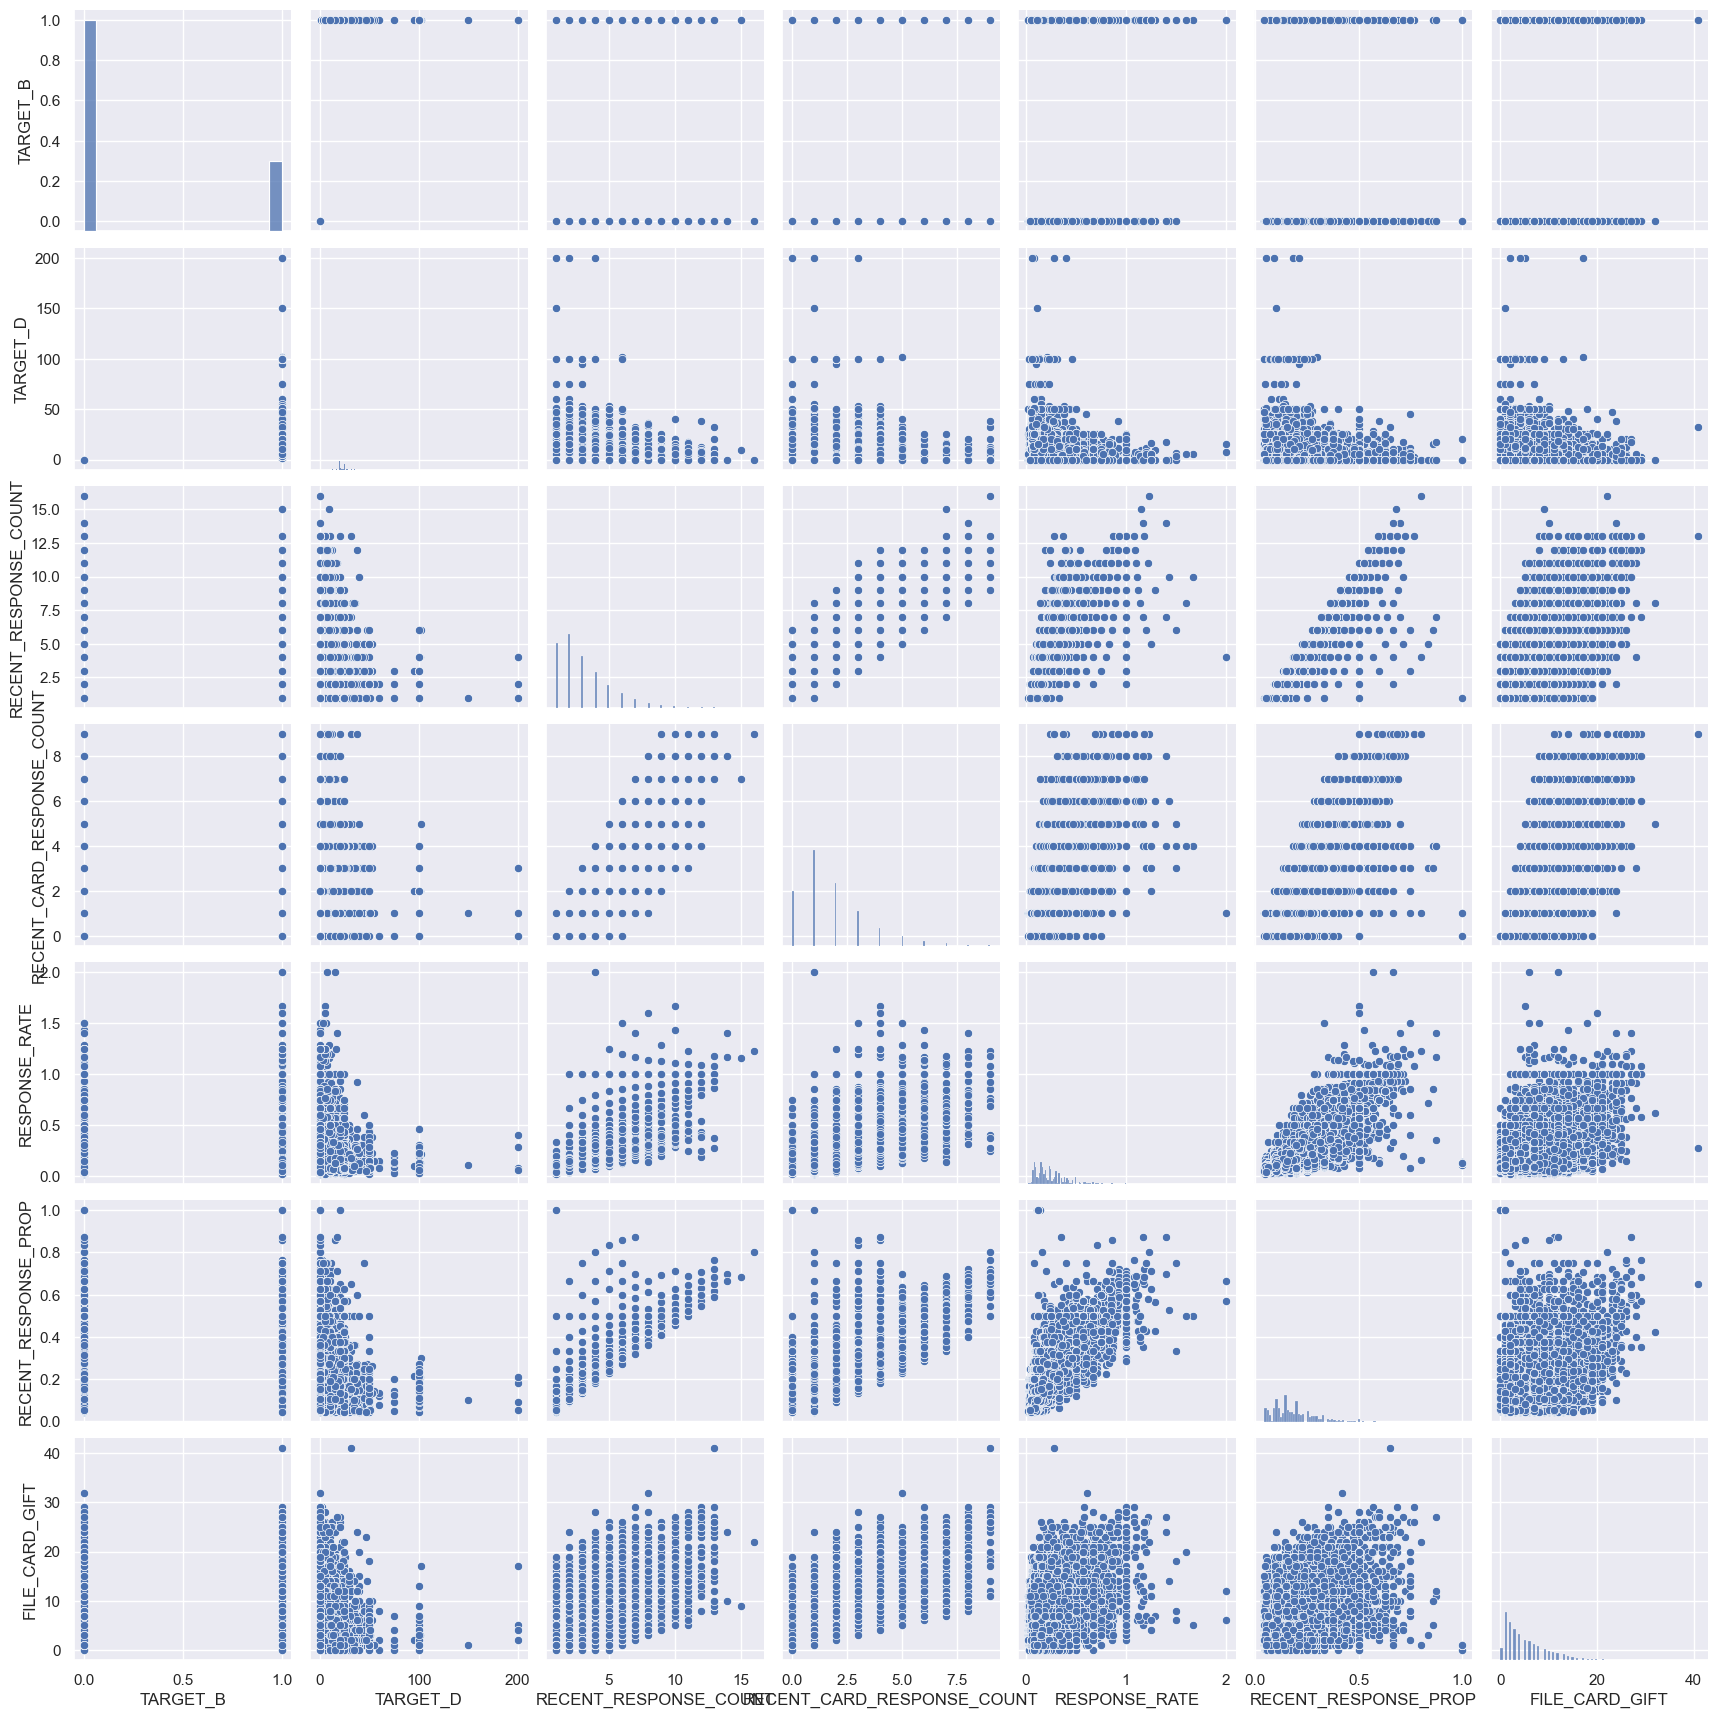

In [26]:
sns.pairplot(data=donor_raw_data[['TARGET_B', 'TARGET_D', 'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT', 'RESPONSE_RATE', 'RECENT_RESPONSE_PROP', 'FILE_CARD_GIFT']])


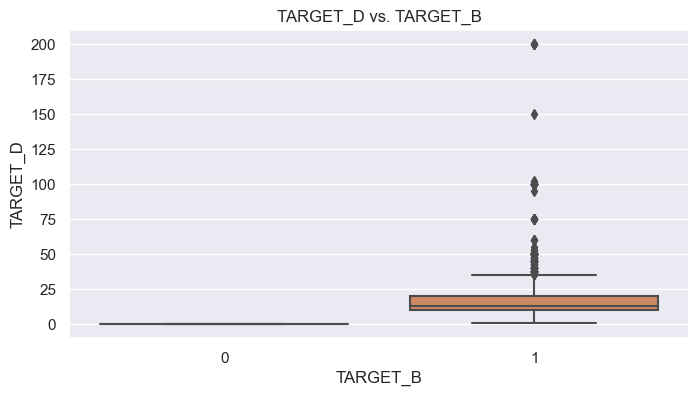

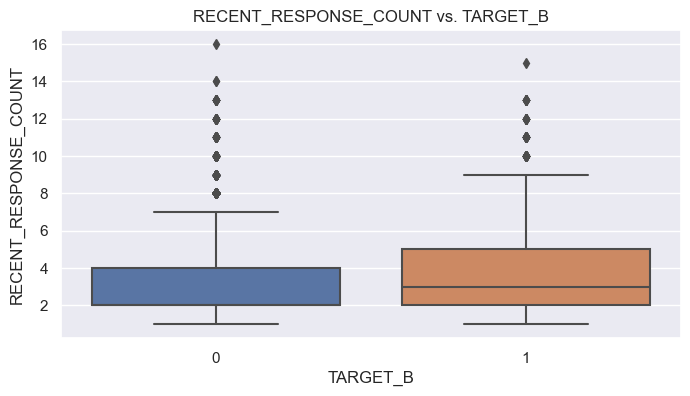

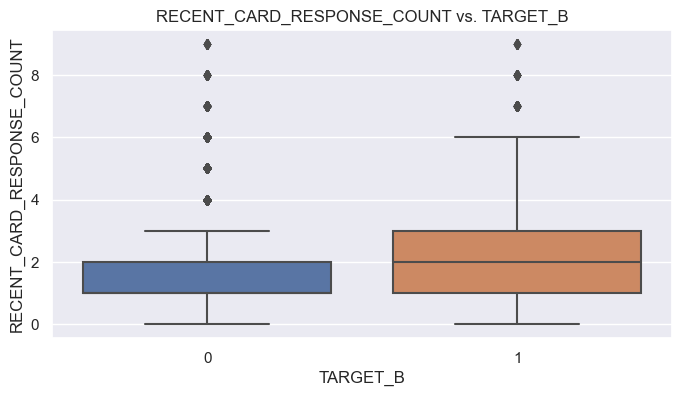

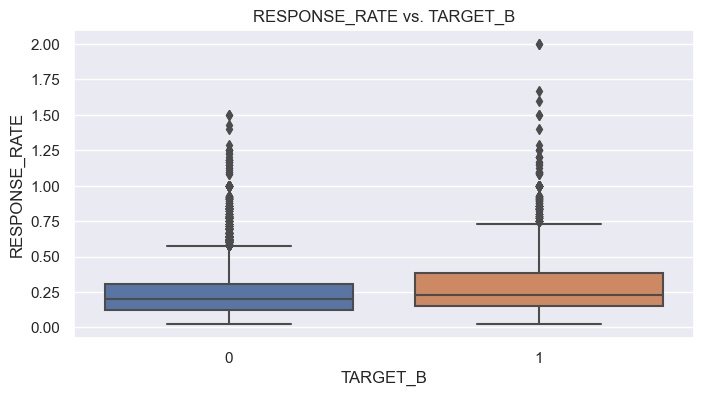

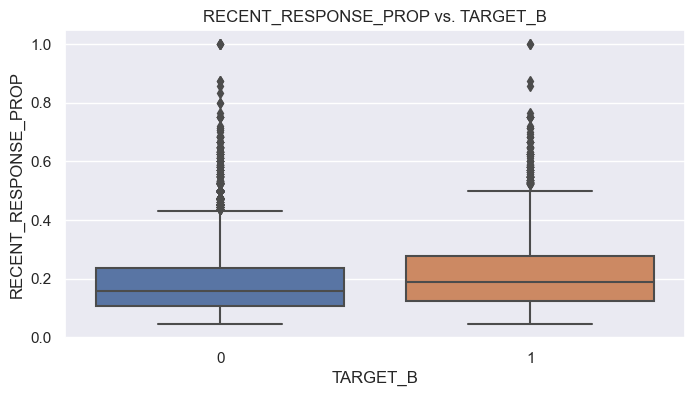

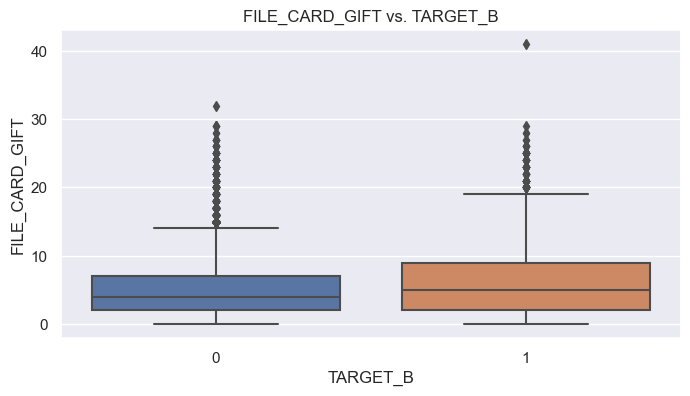

In [27]:
for var in ['TARGET_D', 'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT', 'RESPONSE_RATE', 'RECENT_RESPONSE_PROP', 'FILE_CARD_GIFT']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='TARGET_B', y=var, data=donor_raw_data)
    plt.title(f'{var} vs. TARGET_B')
    plt.show()


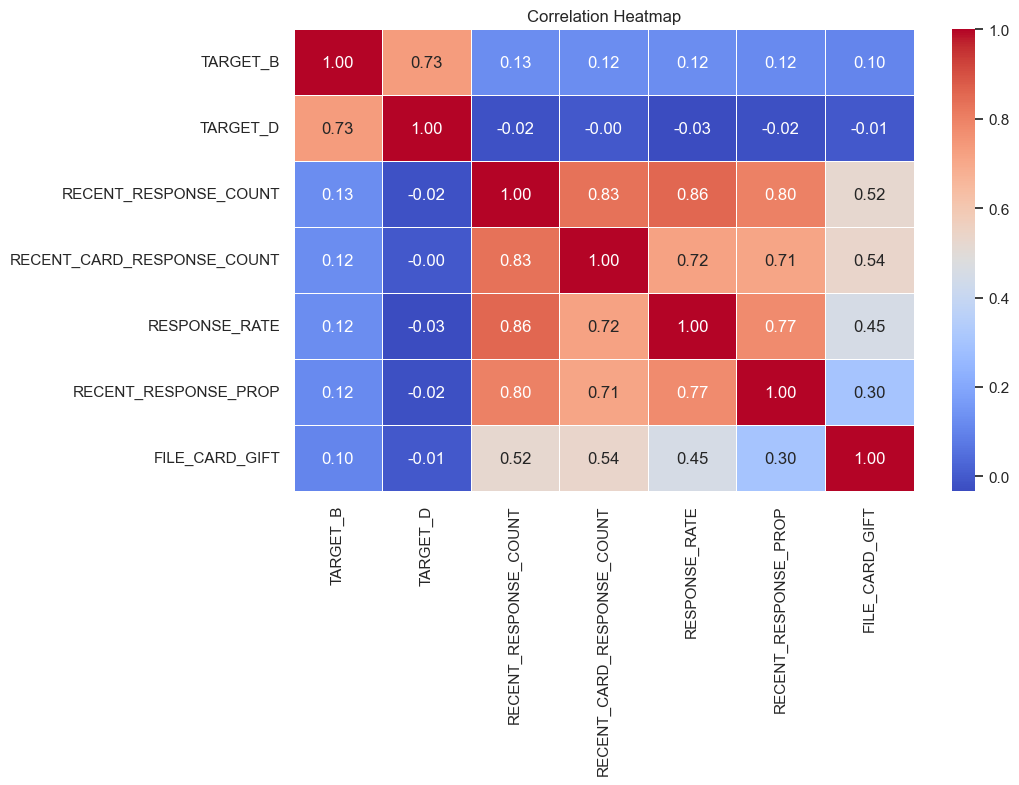

In [28]:
# summary_stats = donor_raw_data[['TARGET_B', 'TARGET_D', 'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT', 'RESPONSE_RATE', 'RECENT_RESPONSE_PROP', 'FILE_CARD_GIFT']].describe()
correlations = donor_raw_data[['TARGET_B', 'TARGET_D', 'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT', 'RESPONSE_RATE', 'RECENT_RESPONSE_PROP', 'FILE_CARD_GIFT']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [29]:
categorical_columns = ['IN_HOUSE', 'URBANICITY', 'SES', 
                       'INCOME_GROUP', 'PEP_STAR', 'RECENCY_STATUS_96NK', 
                       'FREQUENCY_STATUS_97NK', 'DONOR_AGE_GROUP']

for column in categorical_columns:
    contingency_table = pd.crosstab(donor_raw_data[column], donor_raw_data['TARGET_B'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f'{column} Chi-Square p-value: {p}')


IN_HOUSE Chi-Square p-value: 8.322399247697229e-09
URBANICITY Chi-Square p-value: 0.00015611178076090787
SES Chi-Square p-value: 5.675998956728872e-09
INCOME_GROUP Chi-Square p-value: 0.00011352240239779247
PEP_STAR Chi-Square p-value: 5.707842078350465e-48
RECENCY_STATUS_96NK Chi-Square p-value: 1.1352602648987553e-43
FREQUENCY_STATUS_97NK Chi-Square p-value: 6.723621268788683e-77
DONOR_AGE_GROUP Chi-Square p-value: 7.191502255809369e-06


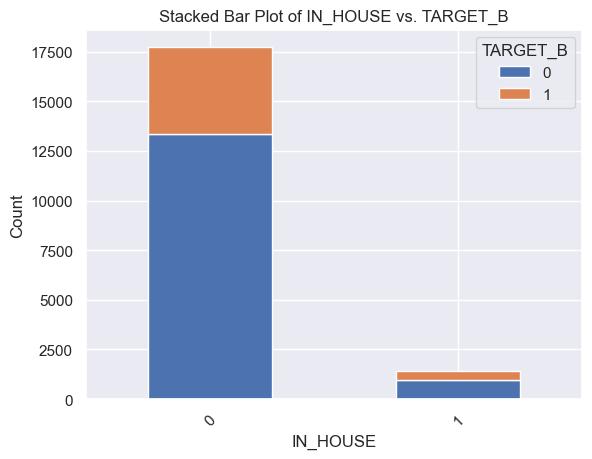

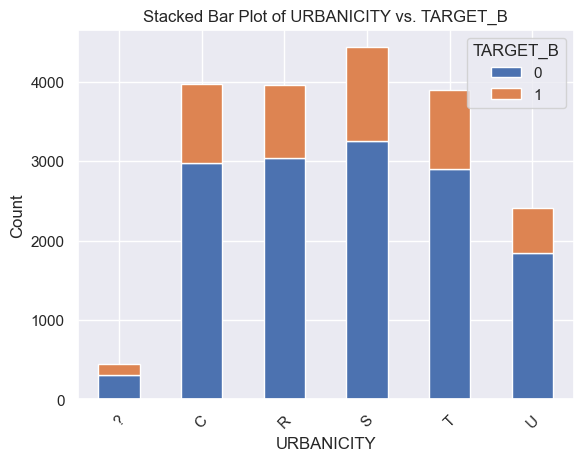

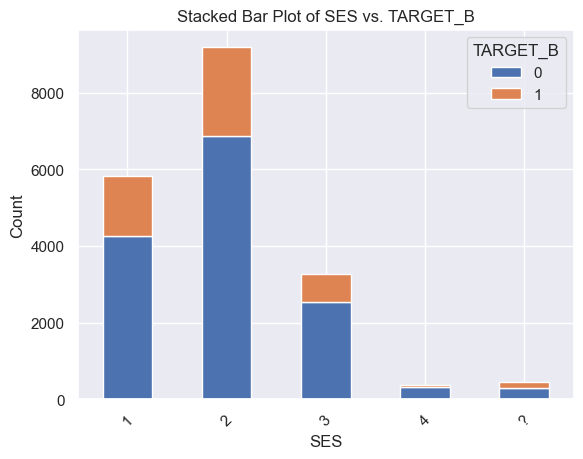

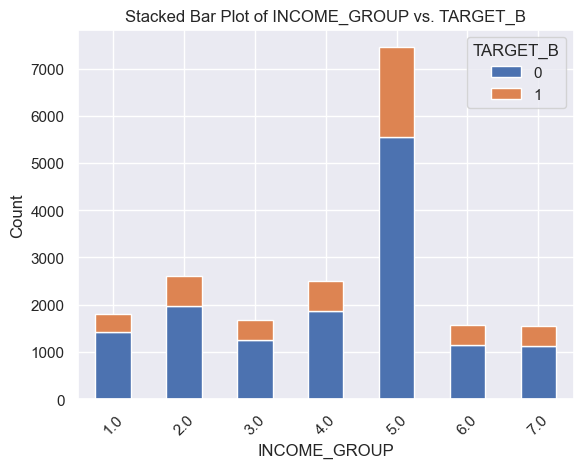

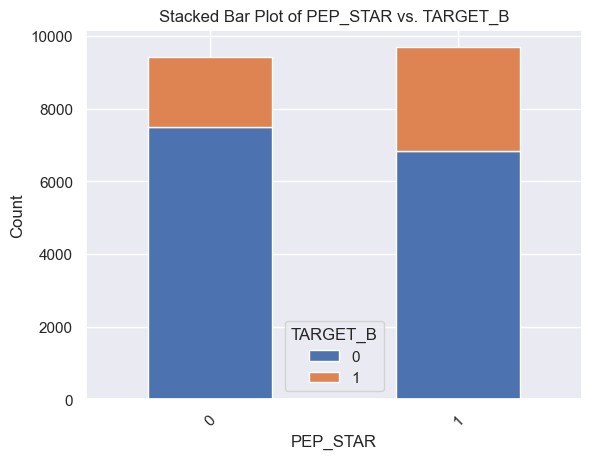

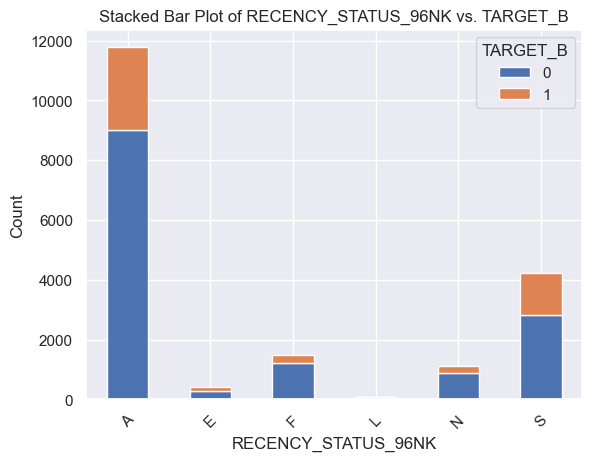

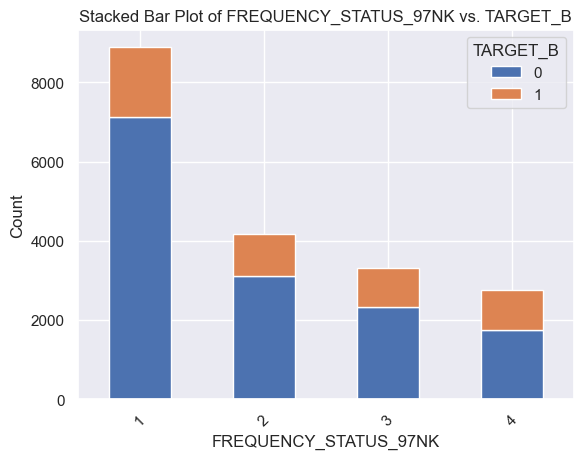

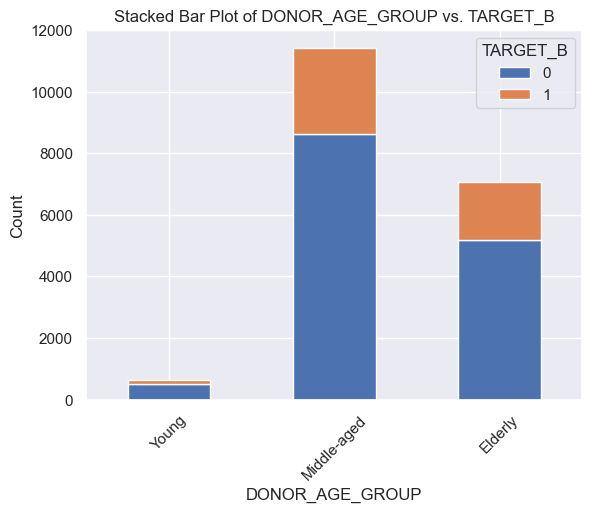

In [30]:
for column in categorical_columns:
    contingency_table = pd.crosstab(donor_raw_data[column], donor_raw_data['TARGET_B'])
    contingency_table.plot(kind='bar', stacked=True)
    plt.title(f'Stacked Bar Plot of {column} vs. TARGET_B')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='TARGET_B', labels=['0', '1'])
    plt.show()


## Building ML Model

In [31]:
# List of columns to keep
columns_to_keep = [
    'TARGET_B', 'TARGET_D', 'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT',
    'RESPONSE_RATE', 'RECENT_RESPONSE_PROP', 'FILE_CARD_GIFT',
    'IN_HOUSE', 'URBANICITY', 'SES', 'INCOME_GROUP', 'PEP_STAR',
    'RECENCY_STATUS_96NK', 'FREQUENCY_STATUS_97NK', 'DONOR_AGE_GROUP'
]

columns_to_keep_p = [
    'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT',
    'RESPONSE_RATE', 'RECENT_RESPONSE_PROP', 'FILE_CARD_GIFT',
    'IN_HOUSE', 'URBANICITY', 'SES', 'INCOME_GROUP', 'PEP_STAR',
    'RECENCY_STATUS_96NK', 'FREQUENCY_STATUS_97NK', 'DONOR_AGE_GROUP'
]


prospective_donors = prospective_donors[columns_to_keep_p]

# Select and keep only the desired columns
donor_raw_data = donor_raw_data[columns_to_keep]

In [33]:
multi_categorical_cols = ['URBANICITY', 'SES', 'INCOME_GROUP', 'RECENCY_STATUS_96NK', 'FREQUENCY_STATUS_97NK', 'DONOR_AGE_GROUP']

donor_raw_data = pd.get_dummies(donor_raw_data, columns=multi_categorical_cols, drop_first=True)




In [35]:
donor_raw_data.columns

Index(['TARGET_B', 'TARGET_D', 'RECENT_RESPONSE_COUNT',
       'RECENT_CARD_RESPONSE_COUNT', 'RESPONSE_RATE', 'RECENT_RESPONSE_PROP',
       'FILE_CARD_GIFT', 'IN_HOUSE', 'PEP_STAR', 'URBANICITY_C',
       'URBANICITY_R', 'URBANICITY_S', 'URBANICITY_T', 'URBANICITY_U', 'SES_2',
       'SES_3', 'SES_4', 'SES_?', 'INCOME_GROUP_2.0', 'INCOME_GROUP_3.0',
       'INCOME_GROUP_4.0', 'INCOME_GROUP_5.0', 'INCOME_GROUP_6.0',
       'INCOME_GROUP_7.0', 'RECENCY_STATUS_96NK_E', 'RECENCY_STATUS_96NK_F',
       'RECENCY_STATUS_96NK_L', 'RECENCY_STATUS_96NK_N',
       'RECENCY_STATUS_96NK_S', 'FREQUENCY_STATUS_97NK_2',
       'FREQUENCY_STATUS_97NK_3', 'FREQUENCY_STATUS_97NK_4',
       'DONOR_AGE_GROUP_Middle-aged', 'DONOR_AGE_GROUP_Elderly'],
      dtype='object')

In [36]:
# Split the data into train and test sets
X = donor_raw_data.drop(['TARGET_B', 'TARGET_D'], axis=1)
y = donor_raw_data['TARGET_B']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# # 

In [38]:
# Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
# Model Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7169367485624674
              precision    recall  f1-score   support

           0       0.74      0.95      0.83      2823
           1       0.30      0.06      0.10      1003

    accuracy                           0.72      3826
   macro avg       0.52      0.51      0.47      3826
weighted avg       0.63      0.72      0.64      3826



In [40]:
# Investigating on feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance)


                        Feature  Importance
3          RECENT_RESPONSE_PROP    0.172359
2                 RESPONSE_RATE    0.165525
4                FILE_CARD_GIFT    0.128119
1    RECENT_CARD_RESPONSE_COUNT    0.068209
0         RECENT_RESPONSE_COUNT    0.049224
12                        SES_2    0.033292
19             INCOME_GROUP_5.0    0.028868
9                  URBANICITY_S    0.021670
7                  URBANICITY_C    0.021547
10                 URBANICITY_T    0.021543
30  DONOR_AGE_GROUP_Middle-aged    0.021121
31      DONOR_AGE_GROUP_Elderly    0.019474
8                  URBANICITY_R    0.019351
18             INCOME_GROUP_4.0    0.019183
16             INCOME_GROUP_2.0    0.018443
27      FREQUENCY_STATUS_97NK_2    0.017643
13                        SES_3    0.017619
11                 URBANICITY_U    0.017310
6                      PEP_STAR    0.016769
17             INCOME_GROUP_3.0    0.016242
20             INCOME_GROUP_6.0    0.015043
26        RECENCY_STATUS_96NK_S 

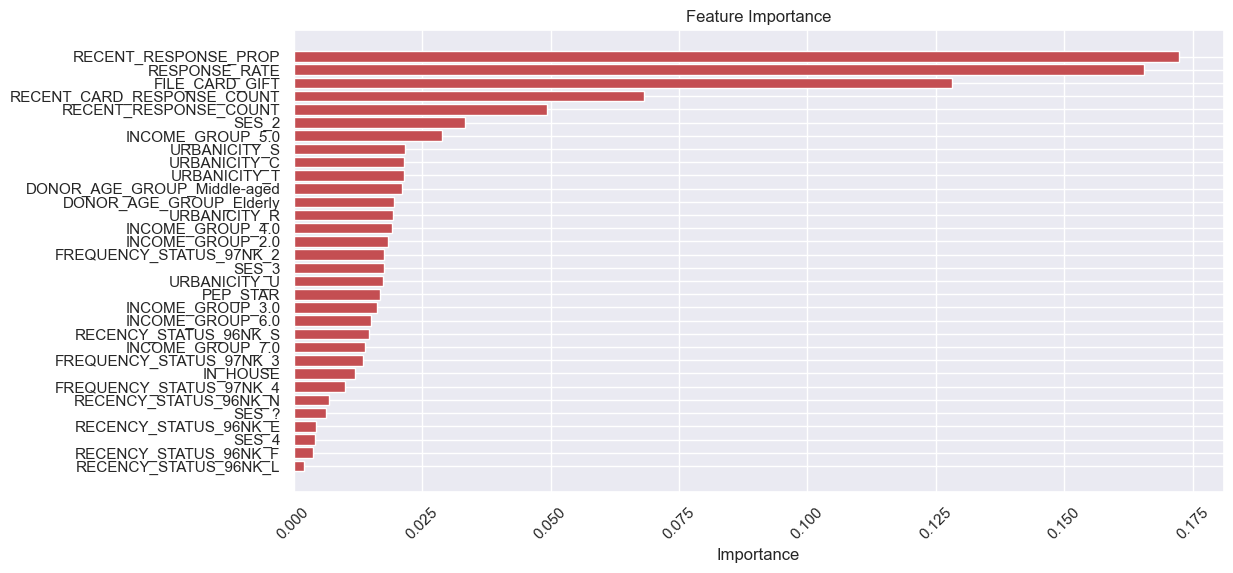

In [41]:
# Visual feature importance
std = np.std(feature_importance['Importance'])

plt.figure(figsize=(12, 6))
plt.title("Feature importances")
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='r', align="center")
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.xticks(rotation=45)
plt.show()


## Prospect Selection

In [42]:
prospective_donors.columns

Index(['RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT', 'RESPONSE_RATE',
       'RECENT_RESPONSE_PROP', 'FILE_CARD_GIFT', 'IN_HOUSE', 'URBANICITY',
       'SES', 'INCOME_GROUP', 'PEP_STAR', 'RECENCY_STATUS_96NK',
       'FREQUENCY_STATUS_97NK', 'DONOR_AGE_GROUP'],
      dtype='object')

In [45]:
# Use the trained model to predict responses for prospective donors
prospective_donors_encoded = prospective_donors.copy()
# for column in multi_categorical_cols:
#     prospective_donors_encoded[column] = encoder.transform(prospective_donors_encoded[column])

prospective_donors_encoded = pd.get_dummies(prospective_donors, columns=multi_categorical_cols, drop_first=True)
prospective_donors_predictions = model.predict_proba(prospective_donors_encoded)[:, 1]

# Rank prospective donors by predicted response probability
prospective_donors['RESPONSE_PROB'] = prospective_donors_predictions
prospective_donors = prospective_donors.sort_values(by='RESPONSE_PROB', ascending=False)

# Select the top prospects for the next campaign
top_prospects = prospective_donors.head(100)

In [46]:
output_csv_file = 'top_prospects.csv'

# Save the 'top_prospects' DataFrame to a CSV file
top_prospects.to_csv(output_csv_file)

print(f"Top prospects saved to {output_csv_file}")


Top prospects saved to top_prospects.csv
